## 준비 하기

`pdfkit`은 웹페이지를 PDF 문서로 만들 수 있다.

    pip install pdfkit
    https://wkhtmltopdf.org/downloads.html 에서 적당한 버전을 다운 받아 설치한다.
    

    pip install pywin32
    pip install reportlab
    https://sourceforge.net/projects/qpdf/ 에서 qpdf 설치
    pip install pikepdf
    pip install tika   # java 7 이상이 설치되어 있어야 실행이 가능하다.
    pip install minecart
    pip install pdf2image # PDF 파일에서 이미지를 추출하는 데 사용한다

웹 페이지를 PDF로 저장

In [1]:
import pdfkit

options = {'quiet': ''}  # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')

pdfkit.from_url('http://naver.com', 'naver.pdf', options=options, configuration=config)
# pdfkit.from_string('Hello!', 'string.pdf', options=options, configuration=config)
# pdfkit.from_file('test.html', 'html.pdf', options=options, configuration=config)

True

여러 웹페이지 혹은 파일을 하나의 pdf로 만들기 위해서는 소스 파일들을 리스트에 묶어서 전달하면 된다.

In [2]:
import pdfkit

options = {'quiet': ''}  # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')
pdfkit.from_url(['http://naver.com', 'http://daum.net'], 'naver_daum.pdf', options=options, configuration=config)
# pdfkit.from_file(['data/test.html', 'data/test2.html'], 'out/out5.pdf', options=options, configuration=config)

True

워드 문서를 PDF로 저장

In [3]:
import os
from win32com.client import Dispatch

wordapp = Dispatch("Word.Application")
wordapp.Visible = False

fpath = os.path.join(os.getcwd(), "sample.docx")  # 파일 경로
myDoc = wordapp.Documents.Open(FileName=fpath)

pdf_path = os.path.join(os.getcwd(), "sample.pdf")  # PDF로 저장
myDoc.SaveAs(pdf_path, FileFormat=17)

myDoc.Close()
wordapp.Quit()

엑셀 문서를 PDF로 저장

In [4]:
import os
from win32com.client import Dispatch

# 엑셀 시작
excelApp = Dispatch("Excel.Application")
excelApp.Visible = False

# 읽어오기
fpath = os.path.abspath('sample1.xlsx')
workbook = excelApp.Workbooks.Open(fpath)

# pdf 포맷으로 저장하기
fpath = os.path.abspath('sample1.pdf')
workbook.ExportAsFixedFormat(0, fpath)  # xlTypePDF : 0

workbook.Close()
excelApp.Quit()

PPT를 PDF로 저장

In [5]:
import os
from win32com.client import Dispatch

# 엑셀 시작
PPTApplication = Dispatch("PowerPoint.Application")
PPTApplication.Visible = False

# 읽어오기
fpath = os.path.abspath('sample.pptx')
ppt = PPTApplication.Presentations.Open(fpath)

# pdf 포맷으로 저장하기
fpath = os.path.abspath('sample_ppt.pdf')
ppt.SaveAs(fpath, 32)  # ppSaveAsPDF

ppt.Close()
PPTApplication.Quit()

이미지 파일을 PDF로 만들기

In [6]:
import glob
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from PIL import Image

# 이미지 파일 목록을 가져온다
flist = glob.glob('cartoon/*.jpg')  # 이미지가 있는 폴더로 경로 변경 해주세요

# 파일 저장을 위한 Canvas 객체를 만든다
pgsize = A4  # 용지 설정
c = canvas.Canvas('cartoon.pdf', pagesize=pgsize)  # 출력 파일, 페이지 크기 변경
w2 = pgsize[0]      # 용지의 폭
for fpath in flist:
    im = Image.open(fpath)  # 이미지를 읽는다
    w, h = im.size  # 가로, 세로 이미지 크기를 가져온다
    r = w / h       # 가로, 세로 비를 계산한다
    h2 = w2 / r     # 용지 폭에 맞추어 높이를 계산한다(비율 유지)
    c.drawImage(fpath, 0, 0, w2, h2)  # 이미지를 페이지에 그린다
    c.showPage()    # 한 페이지 정리하고 다음 페이지로 넘어간다
c.save()

여러 PDF 파일 하나로 합치기


In [7]:
from PyPDF2 import PdfFileMerger, PdfFileReader

filenames = glob.glob('data/*.pdf')

merger = PdfFileMerger()
for filename in filenames:
    merger.append(PdfFileReader(open(filename, 'rb')))

merger.write("one_book.pdf")

하나의 PDF 파일을 여러 PDF 파일로 분리하기


In [8]:
from PyPDF2 import PdfFileWriter, PdfFileReader

inputpdf = PdfFileReader(open("data/sample_book.pdf", "rb"))

parts = [(0, 10), (10, 20)]
for k, (start, end) in enumerate(parts):
    end = min(end, inputpdf.numPages)
    output = PdfFileWriter()
    for i in range(start, end):
        output.addPage(inputpdf.getPage(i))
        
    with open("data/splitbook_%s.pdf" % k, "wb") as outputStream:
        output.write(outputStream)


PDF 페이지 제거하기

In [9]:
import pikepdf

with pikepdf.open('data/sample_book.pdf') as pdf:
    num_pages = len(pdf.pages)
    pages_to_delete = [2, 4, 6, num_pages-1]  # 첫 페이지는 0 부터 시작한다
    for pg in sorted(pages_to_delete, reverse=True): # 역으로 제거해야 한다
        del pdf.pages[pg]
    pdf.save('data/sample_book_deleted_pages.pdf')

PDF 페이지 회전하기

In [10]:
import pikepdf

my_pdf = pikepdf.Pdf.open('data/sample_book.pdf')
num_pages = len(my_pdf.pages)
pages_to_rotate = [0, 2, 4, 6, num_pages-1]
for pg in pages_to_rotate:
   my_pdf.pages[pg].Rotate = 90
my_pdf.save('data/sample_book_rotated.pdf')

PDF 문서에서 텍스트 추출하기

In [11]:
from tika import parser

raw = parser.from_file('data/pdf-sample.pdf')   # tika 모듈로 pdf 파일을 분석한다
content = raw['content']               # 본문 text 내용을 읽어낸다
print(content.strip())

This is a test PDF file


Adobe Acrobat PDF Files

Adobe® Portable Document Format (PDF) is a universal file format that preserves all
of the fonts, formatting, colours and graphics of any source document, regardless of
the application and platform used to create it.

Adobe PDF is an ideal format for electronic document distribution as it overcomes the
problems commonly encountered with electronic file sharing.

•  Anyone, anywhere can open a PDF file. All you need is the free Adobe Acrobat
Reader. Recipients of other file formats sometimes can't open files because they
don't have the applications used to create the documents.

•  PDF files always print correctly on any printing device.

•  PDF files always display exactly as created, regardless of fonts, software, and
operating systems. Fonts, and graphics are not lost due to platform, software, and
version incompatibilities.

•  The free Acrobat Reader is easy to download and can be freely distributed by
anyone.

•  Compact PDF files

In [12]:
from PyPDF2 import PdfFileWriter, PdfFileReader
from tika import parser

# 검색 가능한 PDF 문서로 변환된 스캔한 책을 가져온다
inputpdf = PdfFileReader(open("data/scanned_book.pdf", "rb"))

# 텍스트를 추출할 대상 페이지를 모은 임시 파일을 만든다
output = PdfFileWriter()
for i in [4, 5]:
    output.addPage(inputpdf.getPage(i))
with open("tmp.pdf", "wb") as outputStream:
    output.write(outputStream)
    
# 임시 파일에서 텍스트를 추출한다.
raw = parser.from_file('tmp.pdf')
content = raw['content']    # 본문 text 내용을 읽어낸다
print(content.strip())

여러분의 상상이 현실이 되는 사물인터넷... • • • • • • • • • • • • • • • • • •

시물인터넷0oT)은 인터넷에 연결된 모든 것으로 스미트폰, 스마트패드, 스마

트 w, 스미트 자동차 스마트 홈 등 인터넷에 연결된 모든 기기로 생긱할 수

있습니댜 기존의 PC나 PDA 역시 네트워크에 연결되어 인터넷을 사용했지

만 기기들 시bI에 능동적으로 동직할 수 없었고 시람이 원하는 내용만을 가

져와서 표시했습니댜 히지만 사물인터넷 시대의 스미트 기기들은 기기들 서

로나 시림콰 기기 시cl"2M)에 통신할 수 있고 이러한 통신을 통해서 다양

한 서 비스들을 제공할 수 있습니 다.

시물인터넷을 한마디로 정의히키란 쉽지 않습니다 지난 10여 년간 인터넷을

시용하던 주체가 시람이었다면, 시물인터넷 시대에는 인터넷을 시용하는 주

체가 사물(n,ings), 즉 스마트 기기라고 생긱할 수 있습니댜 이러한 시물인터

넷 기기들 시cI에 수집되는 데이터는 빅데이터ⓕig Dat책와 맞물려서 구매나

소비와 같은 정보 공간에서 인간 행동 패턴 분석 등 더 큰 시너지 효피를 가져

올 수 있습니다.

이 책은 크게 7개 부분에 걸쳐서 사물인터넷을 설명히고 있습니댜 먼저 사물

인터넷의 전체적인 모습과 개요에 대해서 설명하고, 스마트폰의 혁명과 진화

를 이야기히펴, 디먕한 웨어러블(Weambl㉱ 디바이스를 다룹니다. 이어서 스

미트 W와 스미트 홈ⓕmart Home)을 이oM하며 3D 시대와 기싱현실 기술

을 디룹니댜 또한 아두이노(Arduino)나 리즈베리 피cl㉳aspberry PD와 같은

오픈 하드웨어 플랫폼과 스크래치ⓕcratdn), 메이커 폐어빼aker Faire)를 이야

기히고, 마지믹으로 디지털 혁명의 문제점과 먹는 컴퓨터나 스미트 자동치와

4 사물인터넷-loT



같은 사물인터넷의 전반에 대해서 설명하고 있습니댜

책에서 이야기히는 이러한 사물인터넷과 관련된 내용을 통해서 앞으로 미래

사회를 예측해보고, 싱싱을 통해서 새로

암호 걸린 PDF 문서 읽어내기

In [13]:
import pikepdf

# 개인 정보 문제로 샘플 파일을 제공해드리 못함을 죄송하게 생각합니다.
pdf = pikepdf.open('skt12.pdf', password='some_password')  # 암호화된 파일을 읽어서
pdf.save('output.pdf')  # 임시 파일로 저장한다

In [14]:
from tika import parser

raw = parser.from_file('output.pdf')   # tika 모듈로 pdf 파일을 분석한다
content = raw['content']               # 본문 text 내용을 읽어낸다
print(content.strip()[100:200])        # 내용 일부만 확인

서비스 요금 29,700원을 포함한 총 29,700원 입니다.

통신서비스요금

29,700

월정액 36,000 요금할인 -9,000

부가가치세(세금)* 2,700

부가사용금


암호없이 Encrypt된 PDF 문서 읽기


In [15]:
import pikepdf

pdf = pikepdf.open('data/encrypted_wo_pw.pdf')
pdf.save('output.pdf')  # 임시 파일로 저장한다

PDF 문서에서 이미지 추출하기

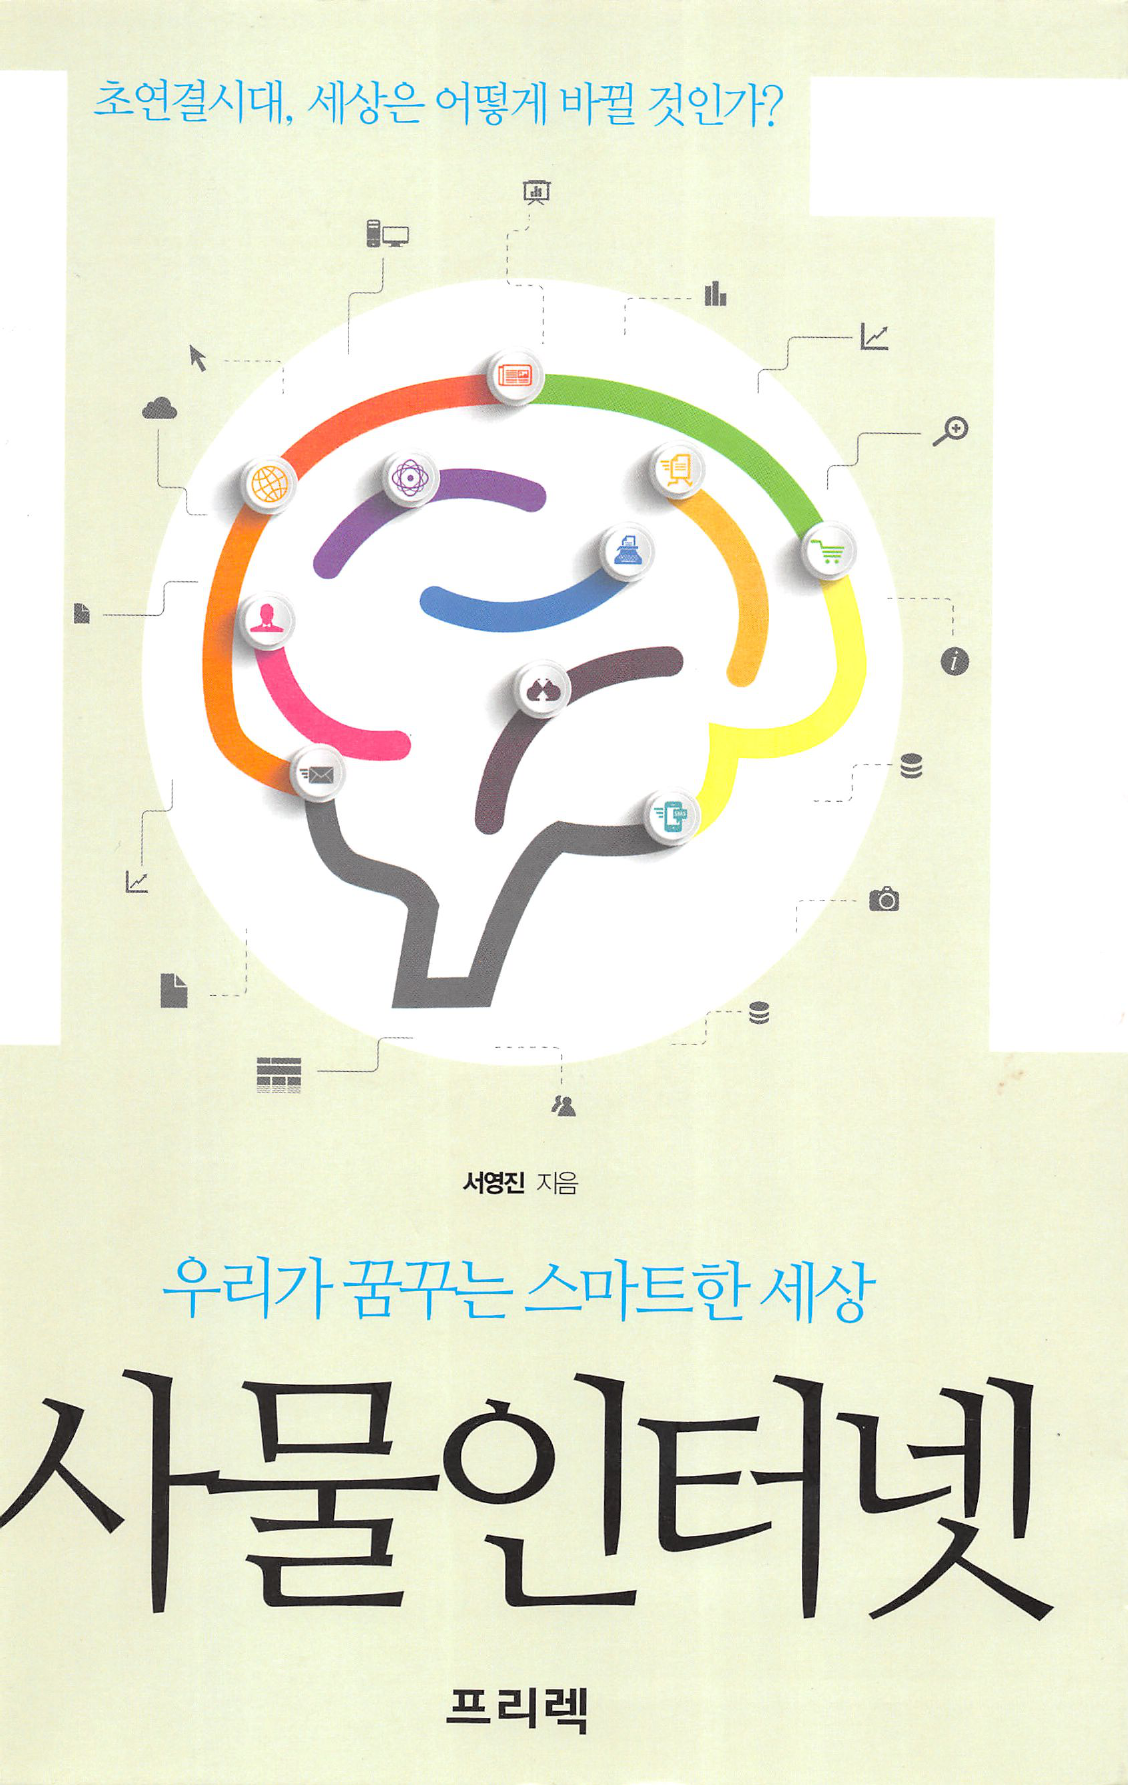

In [16]:
from pdf2image import convert_from_path

images = convert_from_path('data/scanned_book.pdf')
images[0]

In [17]:
images = convert_from_path('data/scanned_book.pdf', dpi=600, first_page=0, last_page=1)
images[0].save('first_page.png')

In [18]:
images_from_path = convert_from_path('data/scanned_book.pdf', fmt='png', output_folder='tmp')
images_from_path

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1128x1785 at 0x17D82255400>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1137x1780 at 0x17D822552B0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1138x1781 at 0x17D822554A8>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1139x1779 at 0x17D82255B00>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1136x1778 at 0x17D82255B70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1136x1779 at 0x17D82255BE0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1136x1778 at 0x17D82255C50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1137x1777 at 0x17D82255CC0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1136x1778 at 0x17D82255D30>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1135x1773 at 0x17D82255DA0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1136x1777 at 0x17D82255E10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1135x1778 at 0x17D82255E80>,
 <PI

In [19]:
for im in images_from_path:
    print(im.filename)

tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-01.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-02.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-03.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-04.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-05.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-06.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-07.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-08.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-09.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-10.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-11.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-12.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-13.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-14.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-15.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-16.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-17.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-18.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-19.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26-20.png
tmp\23a3a290-8a13-4ba2-bdd3-934ae1350e26

## 도전과제

In [20]:
import pytesseract 
from pdf2image import convert_from_path 


PDF_file = "data/scanned_no_ocr.pdf"
  
# 단계 1
pages = convert_from_path(PDF_file, dpi=600) 

for page in pages: 
    page.save('tmp_page.jpg', 'JPEG')  # 단계 2
    # 단계 3
    text = pytesseract.image_to_string(Image.open(filename), lang="kor+eng")
    # 단계 4
    print(text)

고 대 (16) 성 경 사 본 은
정 확 하 게 우 리 에 게 전 해 진 것 일 까 ?

o%,

경 에 대 해 토 론 하 다 보 면 비 그 리 스 도 인 들 은 종종 다 음 과 같 이

반 발 하 곤 한 다 . " 지 금 은 성 경 이 그 렇 게 말 하 는 것 으 로 되 어 있 지만
성 경 은 AS 변 해 오 지 않 았 는 가 ?” 이 러 한 반 론 은 사 실 인 가 ? Ga 우
리 손에 들 려 있 는 성 경 이 영 감 받 은 저 자 에 의 해 처 음 기 록 된 글 자 들
을 고 스 란 히 간 직 하 고 있 는 가 ?

1. 사 본 (※ 조 ) 과 관 련된 이 슈 들 에 대 한 개 관

구 약 성 경 은 원 래 주 전 1400 년 에 서 430 년 사 이에 히 브 리 어로 기록

1 사 실 무 슬림 변 중 가 들 은 무 함 마 드 가 신 구 약 ABS 분 명 히 수 용 하 기 는 했 지만 (Surah
3:3) 성 경 본 문 의 APS 실 제 로 훼 손 되 었 다 고 주 장 한 다 . 그 러 나 무 함 마 드 ( 주 후
570-632 년 ) 의 생 애 보 다 이른 시 기 에 필 사 된 완 벽 한 신 구 약 성 경 사 본 들 이 존 재 하 며
이 문 (1810) 들 에 도 불 구 하 고 이 사 본 들 은 현 대 성 경 AAS 기 초 가 되 는 본 문과
근 본 적 으 로 일 치 한 다 는 점 이 지 적 되 어 야 한 다 .
고 대 (16) 성 경 사 본 은
정 확 하 게 우 리 에 게 전 해 진 것 일 까 ?

o%,

경 에 대 해 토 론 하 다 보 면 비 그 리 스 도 인 들 은 종종 다 음 과 같 이

반 발 하 곤 한 다 . " 지 금 은 성 경 이 그 렇 게 말 하 는 것 으 로 되 어 있 지만
성 경 은 AS 변 해 오 지 않 았 는 가 ?” 이 러 한 반 론 은 사 실 인 가 ? Ga 우
리 손에 들 려 있 는 성 경 이 영 감 받 은 저 자 에 의 해 처 음 기 록 된 글 자 들
을 고 스 란 히 간 직 하 고 있 는 가 ?

1. 사 본 (※ 조 

고 대 (16) 성 경 사 본 은
정 확 하 게 우 리 에 게 전 해 진 것 일 까 ?

o%,

경 에 대 해 토 론 하 다 보 면 비 그 리 스 도 인 들 은 종종 다 음 과 같 이

반 발 하 곤 한 다 . " 지 금 은 성 경 이 그 렇 게 말 하 는 것 으 로 되 어 있 지만
성 경 은 AS 변 해 오 지 않 았 는 가 ?” 이 러 한 반 론 은 사 실 인 가 ? Ga 우
리 손에 들 려 있 는 성 경 이 영 감 받 은 저 자 에 의 해 처 음 기 록 된 글 자 들
을 고 스 란 히 간 직 하 고 있 는 가 ?

1. 사 본 (※ 조 ) 과 관 련된 이 슈 들 에 대 한 개 관

구 약 성 경 은 원 래 주 전 1400 년 에 서 430 년 사 이에 히 브 리 어로 기록

1 사 실 무 슬림 변 중 가 들 은 무 함 마 드 가 신 구 약 ABS 분 명 히 수 용 하 기 는 했 지만 (Surah
3:3) 성 경 본 문 의 APS 실 제 로 훼 손 되 었 다 고 주 장 한 다 . 그 러 나 무 함 마 드 ( 주 후
570-632 년 ) 의 생 애 보 다 이른 시 기 에 필 사 된 완 벽 한 신 구 약 성 경 사 본 들 이 존 재 하 며
이 문 (1810) 들 에 도 불 구 하 고 이 사 본 들 은 현 대 성 경 AAS 기 초 가 되 는 본 문과
근 본 적 으 로 일 치 한 다 는 점 이 지 적 되 어 야 한 다 .
고 대 (16) 성 경 사 본 은
정 확 하 게 우 리 에 게 전 해 진 것 일 까 ?

o%,

경 에 대 해 토 론 하 다 보 면 비 그 리 스 도 인 들 은 종종 다 음 과 같 이

반 발 하 곤 한 다 . " 지 금 은 성 경 이 그 렇 게 말 하 는 것 으 로 되 어 있 지만
성 경 은 AS 변 해 오 지 않 았 는 가 ?” 이 러 한 반 론 은 사 실 인 가 ? Ga 우
리 손에 들 려 있 는 성 경 이 영 감 받 은 저 자 에 의 해 처 음 기 록 된 글 자 들
을 고 스 란 히 간 직 하 고 있 는 가 ?

1. 사 본 (※ 조 